In [1]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

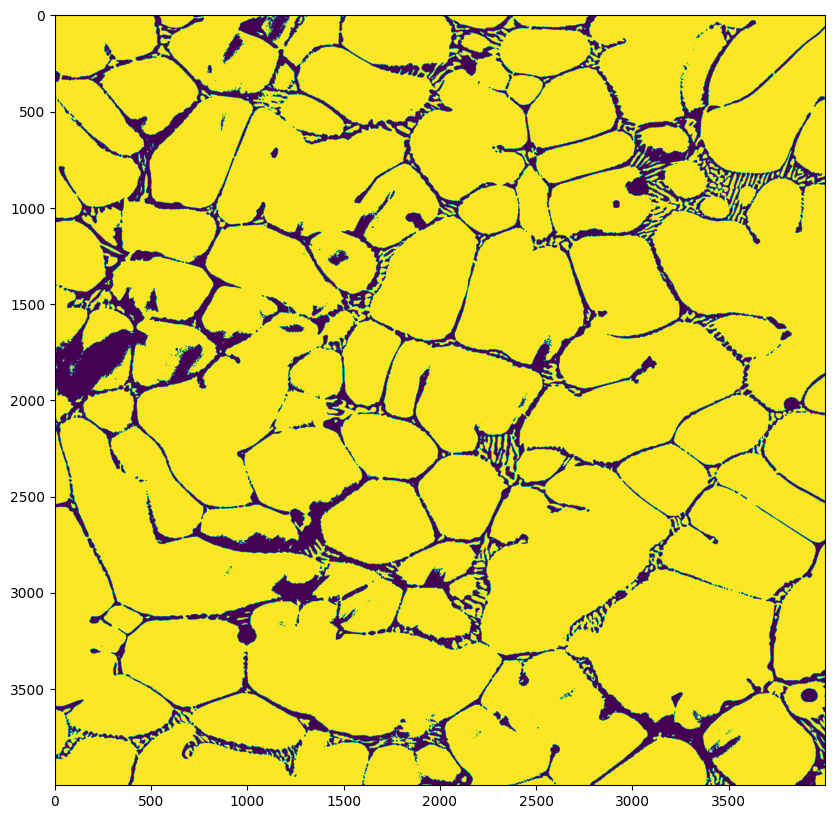

In [14]:
plt.imshow(img)

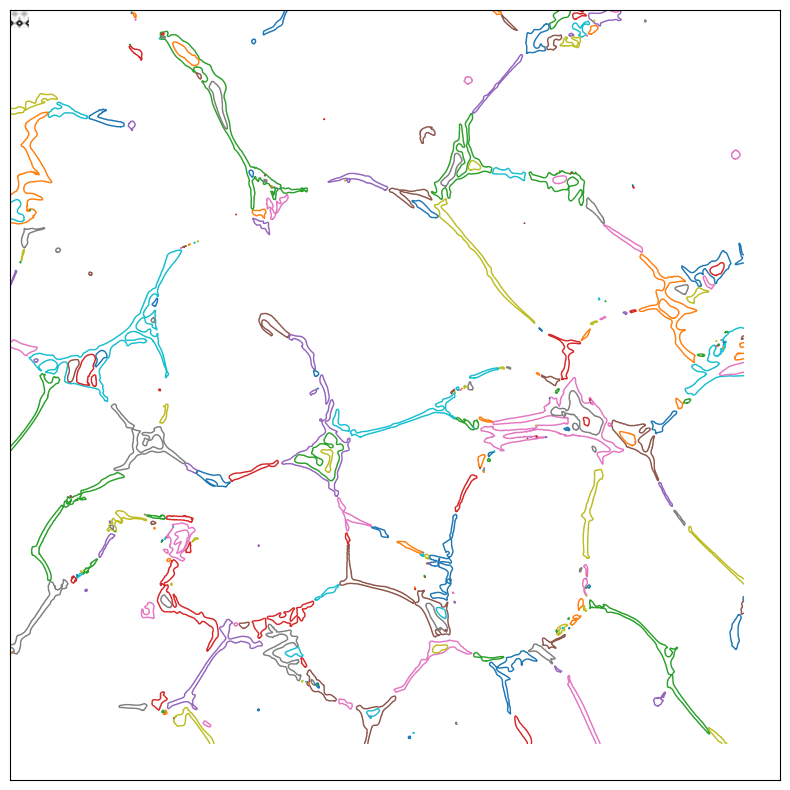

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure
from skimage import io

# Construct some test data
# x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
# r = np.sin(np.exp(np.sin(x)**3 + np.cos(y)**2))
img=io.imread("C:/Promo/quasi_in_situ/new_folder/bnw_conv.png")
# Find contours at a constant value of 0.8
contours = measure.find_contours(img,60,fully_connected='high')

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [37]:
from skimage import morphology
from skimage.util import invert

In [71]:
# out=morphology.skeletonize(invert(img))
skel, distance = morphology.medial_axis(invert(img), return_distance=True)

TypeError: medial_axis() got an unexpected keyword argument 'max_num_iter'

In [89]:
max(dist_on_skel[3600])

15.620499351813308

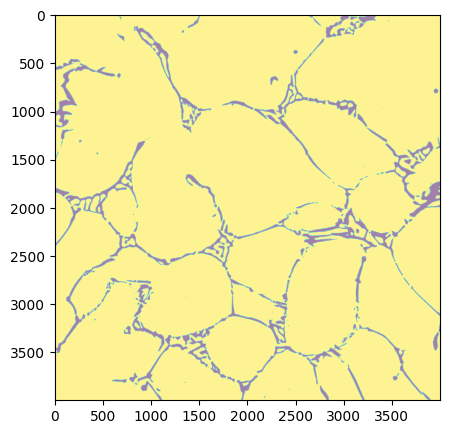

In [125]:
plt.imshow(img,alpha=0.5)


(1000.0, 2000.0)

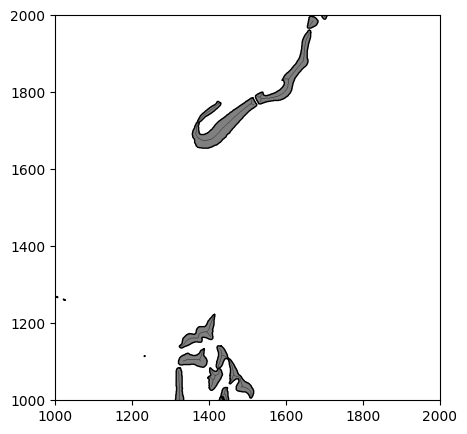

In [137]:
dist_on_skel = distance * skel
fig, ax = plt.subplots()
x=1000
y=1000
ax.imshow(invert(out),cmap=mpl.cm.gray,zorder=1)
ax.imshow(img,alpha=0.5,zorder=2,cmap=mpl.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1,color='black',zorder=2)

ax.set_ylim(x,x+1000)
ax.set_xlim(y,y+1000)


In [62]:

from matplotlib.colors import LinearSegmentedColormap

ncolors = 256
color_array = plt.get_cmap('gray')(range(ncolors))

# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)

# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha',colors=color_array)
# plt.register_cmap(map_object)

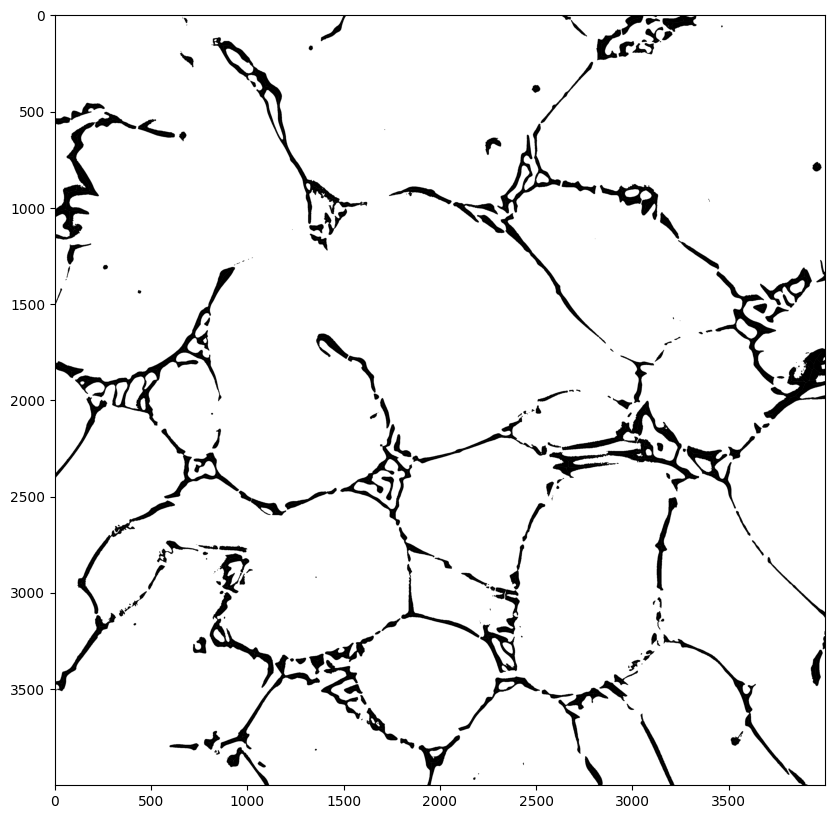

In [63]:
# figure
plt.imshow(img,cmap=plt.cm.gray)
plt.imshow((out),cmap=map_object)
# plt.imshow()


In [47]:
out

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
    

In [100]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(5,5)

[]

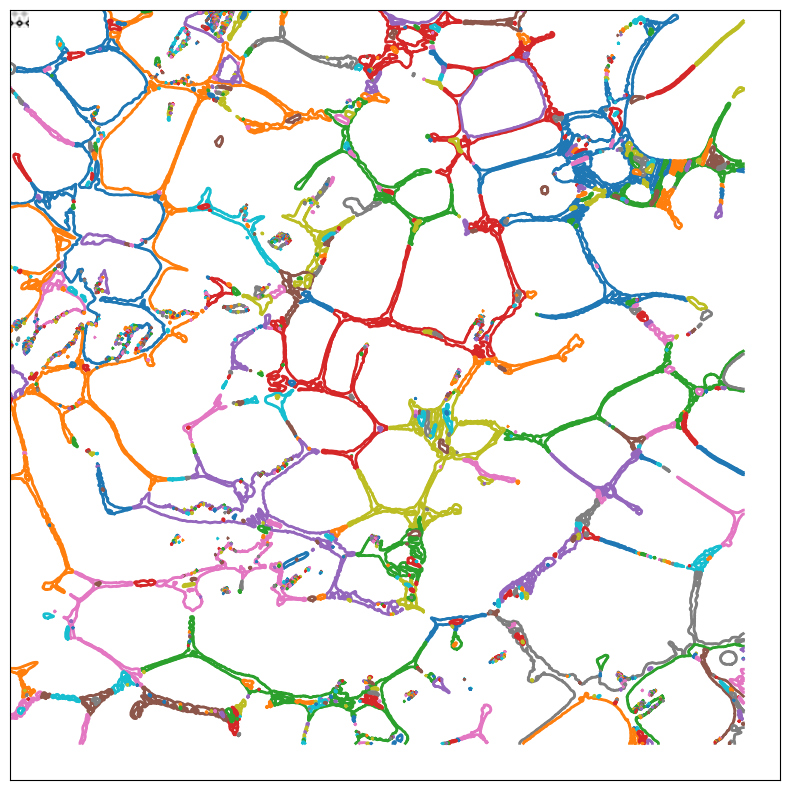

In [13]:
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])